In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, GradientBoostingClassifier

In [67]:
df = pd.read_csv('/content/heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [68]:
df.shape

(303, 14)

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [70]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [71]:
df.shape

(303, 14)

Exploratory Data Analysis of all the variables

In [72]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

Attribute Information
1) age
2) sex
3) chest pain type (4 values)
4) resting blood pressure
5) serum cholestoral in mg/dl
6)fasting blood sugar > 120 mg/dl
7) resting electrocardiographic results (values 0,1,2)
8) maximum heart rate achieved
9) exercise induced angina
10) oldpeak = ST depression induced by exercise relative to rest
11)the slope of the peak exercise ST segment
12) number of major vessels (0-3) colored by flourosopy
13) thal: 0 = normal; 1 = fixed defect; 2 = reversable defect
14) target: 0= less chance of heart attack 1= more chance of heart attack

In [73]:
catcols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca',	'thal']
numcols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

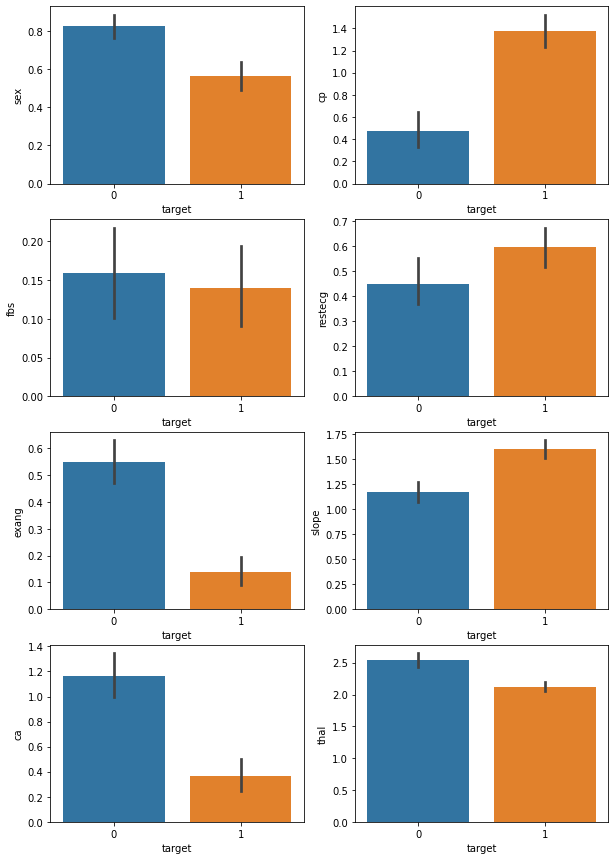

In [74]:
plt.figure(figsize=(10,15))
for i in range(0,8):
  plt.subplot(4,2,i+1)
  sns.barplot(df['target'], df[catcols[i]])

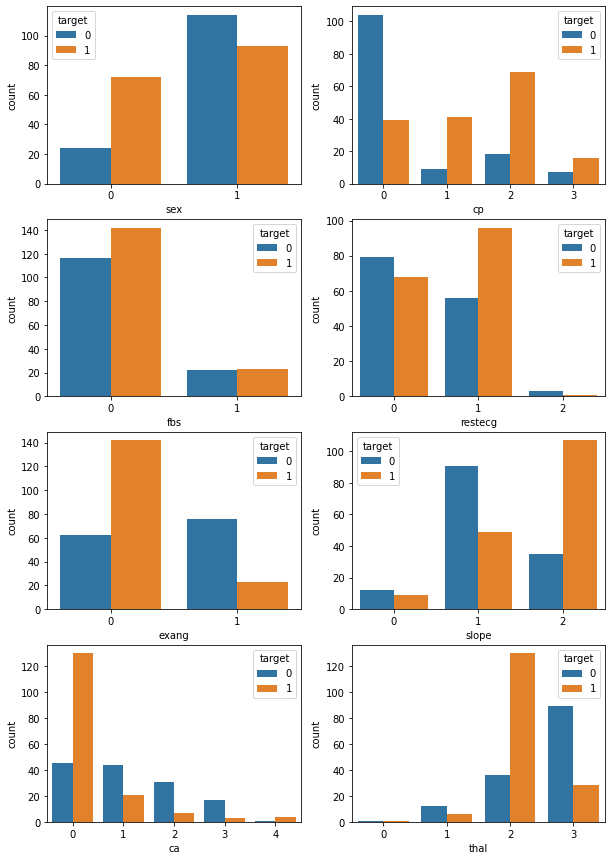

In [75]:
plt.figure(figsize=(10,15))
for i in range(0,8):
  plt.subplot(4,2,i+1)
  sns.countplot(df[catcols[i]], hue ='target', data = df)

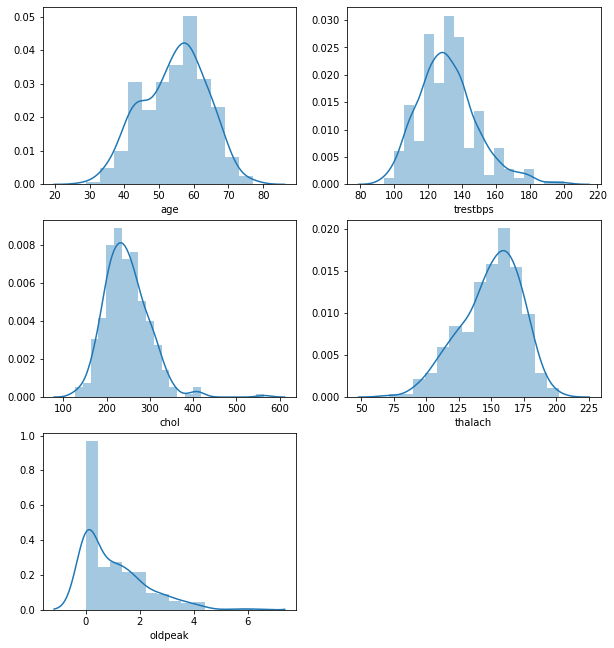

In [76]:
plt.figure(figsize=(10,15))
for i in range(0,5):
  plt.subplot(4,2,i+1)
  sns.distplot(df[numcols[i]])

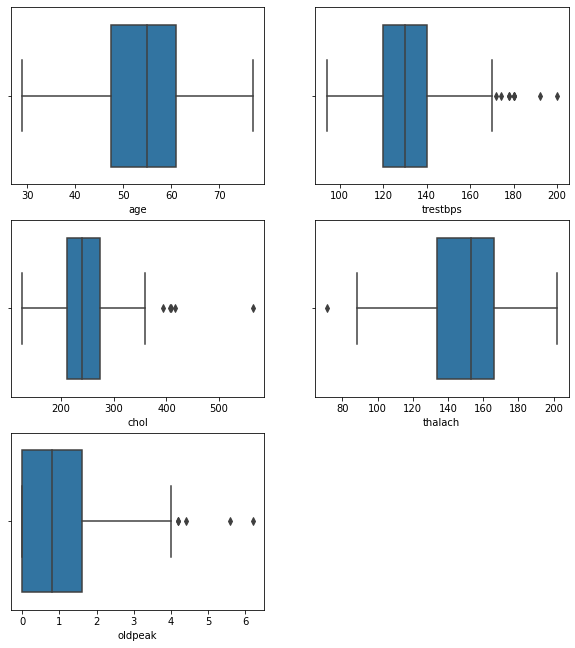

In [77]:
plt.figure(figsize=(10,15))
for i in range(0,5):
  plt.subplot(4,2,i+1)
  sns.boxplot(df[numcols[i]])

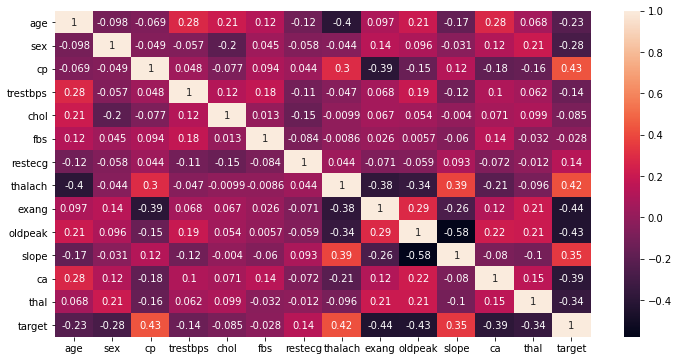

In [78]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(),annot=True)

Text(0.5, 1.0, 'violen plot for target and thalach variable')

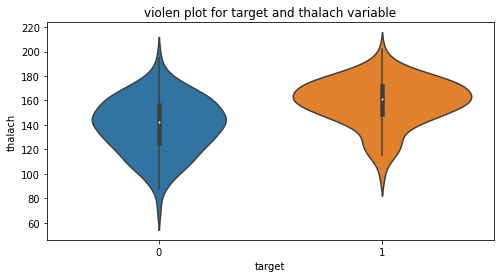

In [79]:
plt.figure(figsize=(8,4))
sns.violinplot(x='target',y='thalach',data=df)
plt.title('violen plot for target and thalach variable')

Text(0.5, 1.0, 'line plot for target and thalach variable')

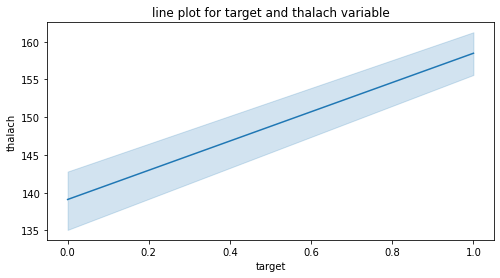

In [80]:
plt.figure(figsize=(8,4))
sns.lineplot(x='target',y='thalach',data=df)
plt.title('line plot for target and thalach variable')

Text(0.5, 1.0, 'bar plot for target and cp variable')

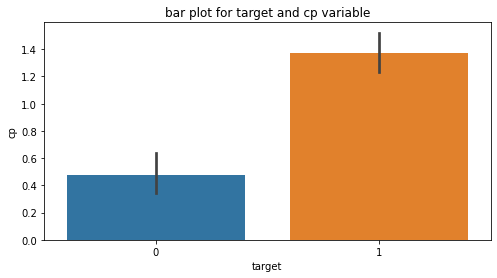

In [81]:
plt.figure(figsize=(8,4))
sns.barplot(x='target',y='cp',data=df)
plt.title('bar plot for target and cp variable')

The dataset is small since i am removing outliers from the datset for better model

In [82]:
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(df))
print(np.where(z > 3))

(array([ 28,  48,  85,  92, 158, 163, 164, 204, 220, 221, 223, 246, 248,
       251, 272, 281]), array([ 4, 12,  4, 11, 11, 11, 11,  9,  4,  9,  3,  4,  3, 11,  7, 12]))


In [83]:
df_withoutoutlier = df[(z < 3).all(axis=1)]

In [84]:
X = df_withoutoutlier.copy()
X = X.drop('target', axis =1)
y = df_withoutoutlier['target']

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state =100)

In [86]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((215, 13), (72, 13), (215,), (72,))

In [87]:
model_LG = LogisticRegression()
model_LG.fit(X_train, y_train)
y_pred = model_LG.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.68      0.77        34
           1       0.76      0.92      0.83        38

    accuracy                           0.81        72
   macro avg       0.82      0.80      0.80        72
weighted avg       0.82      0.81      0.80        72



/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [89]:
print(confusion_matrix(y_test, y_pred))

[[23 11]
 [ 3 35]]


In [90]:
model_RF = RandomForestClassifier()
model_RF.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [92]:
data = pd.Series(model_RF.feature_importances_, index = X_train.columns)

In [93]:
data.sort_values(ascending=True, inplace=True)

Important Features of the dataset

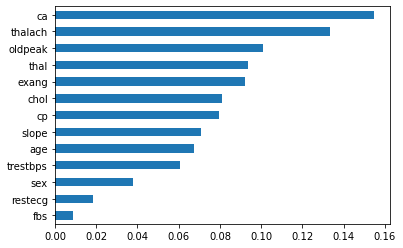

In [94]:
data.plot.barh()

In [95]:
y_pred = model_RF.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.65      0.72        34
           1       0.73      0.87      0.80        38

    accuracy                           0.76        72
   macro avg       0.77      0.76      0.76        72
weighted avg       0.77      0.76      0.76        72



Logistic Regression gives the best results on the above dataset or we can also build our model using some best features.